In [94]:
import os
import json
import random
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# QVI_purchase_behaviour

In [3]:
df = pd.read_csv("QVI_purchase_behaviour.csv")
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [97]:
df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [29]:
#droping missing values
df.dropna(axis = 0, how ='any',inplace=True)

In [27]:
df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [30]:
df['PREMIUM_CUSTOMER'].value_counts(normalize=True)

Mainstream    0.402619
Budget        0.336881
Premium       0.260501
Name: PREMIUM_CUSTOMER, dtype: float64

In [28]:
df['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [31]:
df['LIFESTAGE'].value_counts(normalize=True)

RETIREES                  0.203822
OLDER SINGLES/COUPLES     0.201123
YOUNG SINGLES/COUPLES     0.198811
OLDER FAMILIES            0.134642
YOUNG FAMILIES            0.126354
MIDAGE SINGLES/COUPLES    0.100156
NEW FAMILIES              0.035092
Name: LIFESTAGE, dtype: float64

# Matrix

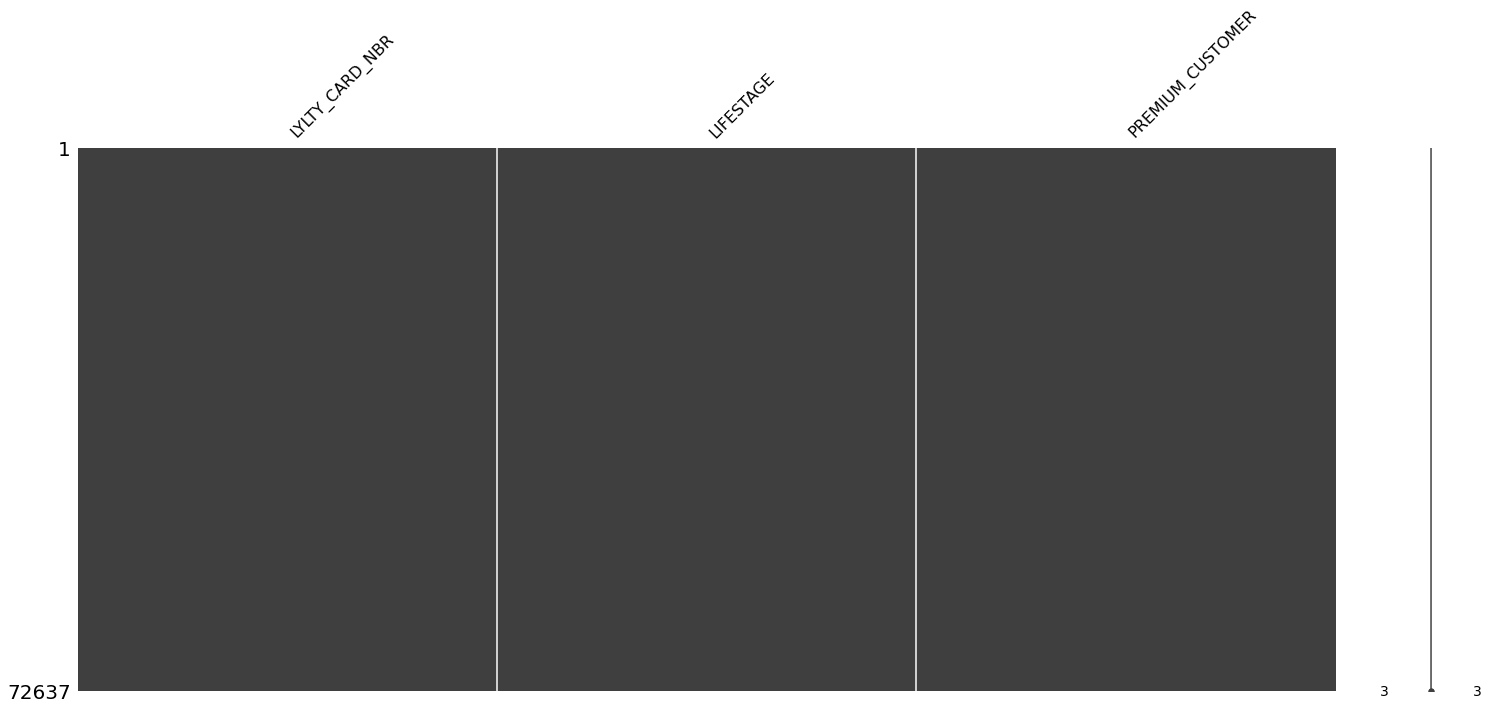

<Figure size 360x288 with 0 Axes>

In [16]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (5,4))
plt.show()

# Dendrogram

In [18]:
# Columns having missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

[]

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

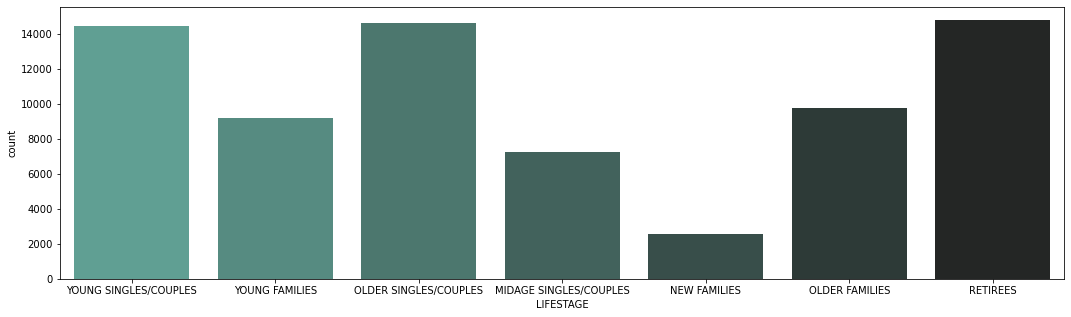

In [8]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(data=df, x="LIFESTAGE",palette="dark:#5A9_r")

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

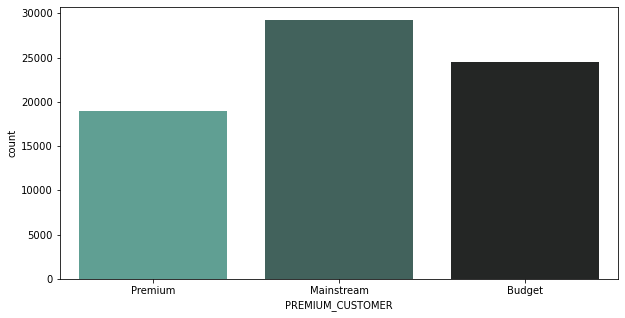

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x="PREMIUM_CUSTOMER",palette="dark:#5A9_r")

# QVI_transaction_data

In [40]:
df1 = pd.read_excel("QVI_transaction_data.xlsx")
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [98]:
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [49]:
df1.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [42]:
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [43]:
#droping missing values
df1.dropna(axis = 0, how ='any',inplace=True)

In [45]:
df1['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [46]:
df1['PROD_NAME'].value_counts(normalize=True)

Kettle Mozzarella   Basil & Pesto 175g      0.012476
Kettle Tortilla ChpsHny&Jlpno Chili 150g    0.012445
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    0.012343
Tyrrells Crisps     Ched & Chives 165g      0.012340
Cobs Popd Sea Salt  Chips 110g              0.012328
                                              ...   
RRD Pc Sea Salt     165g                    0.005403
Woolworths Medium   Salsa 300g              0.005400
NCC Sour Cream &    Garden Chives 175g      0.005358
French Fries Potato Chips 175g              0.005354
WW Crinkle Cut      Original 175g           0.005324
Name: PROD_NAME, Length: 114, dtype: float64

# Matrix

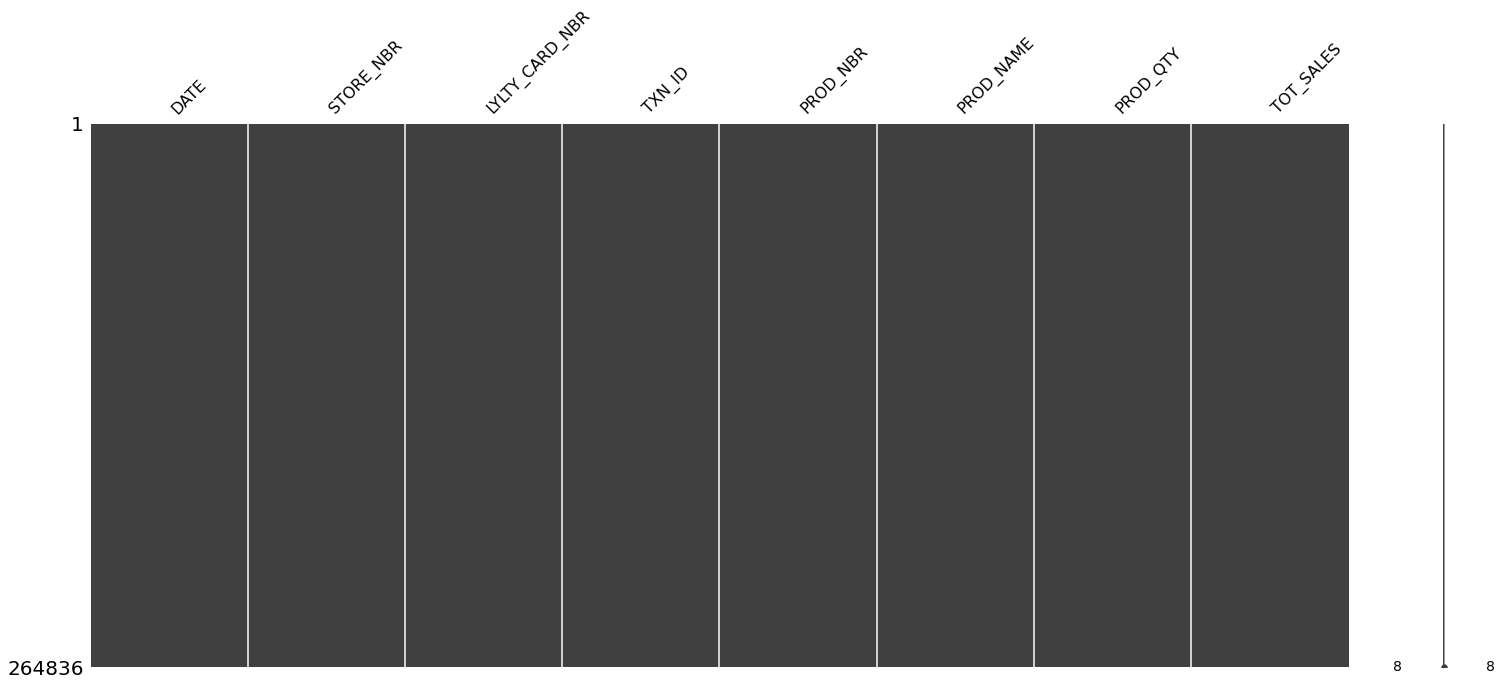

<Figure size 360x288 with 0 Axes>

In [47]:
import missingno as msno
msno.matrix(df1)
plt.figure(figsize = (5,4))
plt.show()

# Dendrogram

In [48]:
# Columns having missing values
missing_columns = [col for col in df1.columns if df1[col].isnull().sum() > 0]
missing_columns

[]

In [68]:
store_prod_count = df1.groupby('STORE_NBR')['PROD_QTY'].sum().reset_index()
print(store_prod_count)

     STORE_NBR  PROD_QTY
0            1       704
1            2       564
2            3      2915
3            4      3316
4            5      2704
..         ...       ...
267        268       732
268        269      3191
269        270      3235
270        271      2740
271        272      1063

[272 rows x 2 columns]


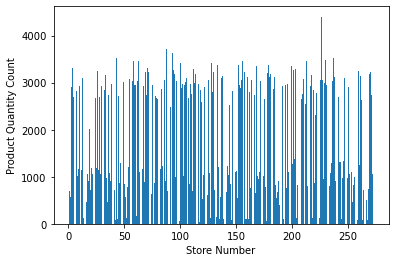

In [70]:
plt.bar(store_prod_count['STORE_NBR'], store_prod_count['PROD_QTY'])
plt.xlabel('Store Number')
plt.ylabel('Product Quantity Count')
plt.show()

In [69]:
store_sales_count = df1.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
print(store_sales_count)

     STORE_NBR  TOT_SALES
0            1    2393.60
1            2    2005.80
2            3   12802.45
3            4   14647.65
4            5    9500.80
..         ...        ...
267        268    2601.05
268        269   11221.80
269        270   11293.95
270        271    9721.80
271        272    4653.95

[272 rows x 2 columns]


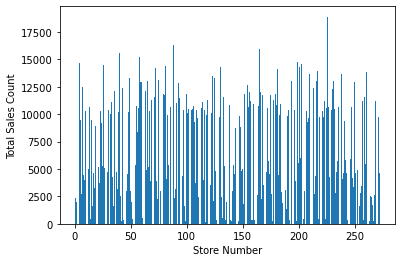

In [71]:
plt.bar(store_sales_count['STORE_NBR'], store_sales_count['TOT_SALES'])
plt.xlabel('Store Number')
plt.ylabel('Total Sales Count')
plt.show()

In [75]:
product_sales_count = df1.groupby('PROD_NBR')['TOT_SALES'].sum().reset_index()
print(product_sales_count)

     PROD_NBR  TOT_SALES
0           1     8125.8
1           2    22944.4
2           3    28308.4
3           4    40352.0
4           5     8331.0
..        ...        ...
109       110     5367.5
110       111     9135.0
111       112    26149.2
112       113    27853.0
113       114    27567.8

[114 rows x 2 columns]


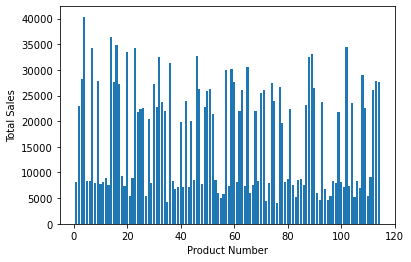

In [77]:
plt.bar(product_sales_count['PROD_NBR'], product_sales_count['TOT_SALES'])
plt.xlabel('Product Number')
plt.ylabel('Total Sales')
plt.show()

In [78]:
product_quantity_count = df1.groupby('PROD_NBR')['PROD_QTY'].sum().reset_index()
print(product_quantity_count)

     PROD_NBR  PROD_QTY
0           1      2802
1           2      6038
2           3      6157
3           4      6509
4           5      2777
..        ...       ...
109       110      2825
110       111      3045
111       112      6227
112       113      6055
113       114      5993

[114 rows x 2 columns]


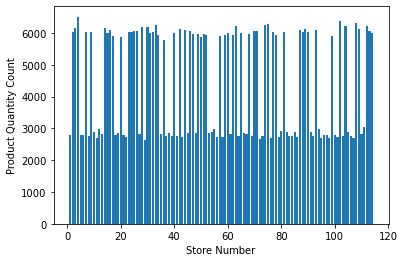

In [79]:
plt.bar(product_quantity_count['PROD_NBR'], product_quantity_count['PROD_QTY'])
plt.xlabel('Store Number')
plt.ylabel('Product Quantity Count')
plt.show()

In [81]:
card_trans_count = df1.groupby('LYLTY_CARD_NBR')['TXN_ID'].sum().reset_index()
print(card_trans_count)

       LYLTY_CARD_NBR  TXN_ID
0                1000       1
1                1002       2
2                1003       7
3                1004       5
4                1005       6
...               ...     ...
72632         2370651  240350
72633         2370701  240378
72634         2370751  240394
72635         2370961  480961
72636         2373711  241815

[72637 rows x 2 columns]


In [83]:
card_quan_count = df1.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum().reset_index()
print(card_quan_count)

       LYLTY_CARD_NBR  PROD_QTY
0                1000         2
1                1002         1
2                1003         2
3                1004         1
4                1005         1
...               ...       ...
72632         2370651         2
72633         2370701         2
72634         2370751         2
72635         2370961         4
72636         2373711         2

[72637 rows x 2 columns]


In [84]:
card_sales_count = df1.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
print(card_sales_count)

       LYLTY_CARD_NBR  TOT_SALES
0                1000        6.0
1                1002        2.7
2                1003        6.6
3                1004        1.9
4                1005        2.8
...               ...        ...
72632         2370651       13.0
72633         2370701        7.2
72634         2370751        9.2
72635         2370961       18.6
72636         2373711       11.4

[72637 rows x 2 columns]


In [89]:
x=df1[df1['TOT_SALES']<8.0]

<AxesSubplot:xlabel='TOT_SALES', ylabel='Density'>

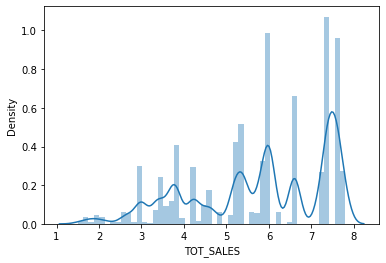

In [95]:
sns.distplot(x.TOT_SALES, kde=True)

<AxesSubplot:xlabel='TOT_SALES'>

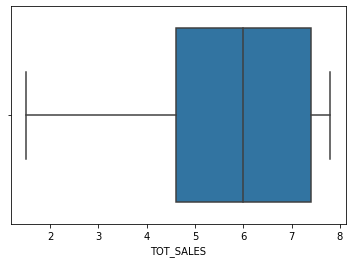

In [96]:
sns.boxplot(x.TOT_SALES)